TSF Task 1 : To explore Supervised Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

Text(0.5, 1.0, 'Hours vs Scores')

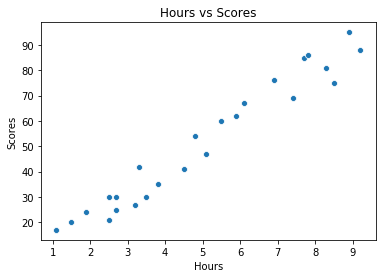

In [5]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')

In [6]:
X=df.iloc[:,:-1]
Y=df.iloc[:,1]

In [7]:
X.shape

(25, 1)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
X_train.shape

(20, 1)

In [10]:
X_test.shape

(5, 1)

Text(0.5, 1.0, 'Hours vs Scores')

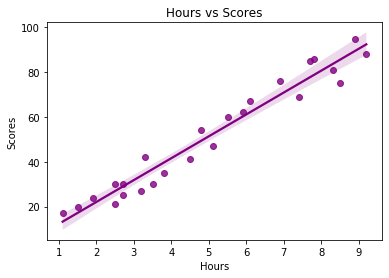

In [11]:
sns.regplot(x=df['Hours'],y=df['Scores'],color='purple')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
Y_pred=lin_reg.predict(X_test)

In [13]:
X_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [14]:
data=X_test.copy()
data['Actual']=Y_test
data['Predicted']=Y_pred
data

,Hours,Actual,Predicted
5,1.5,20,16.884145
2,3.2,27,33.732261
19,7.4,69,75.357018
16,2.5,30,26.794801
11,5.9,62,60.491033


In [15]:
m=lin_reg.coef_
m

array([9.91065648])

In [16]:
c=lin_reg.intercept_
c

2.018160041434683

In [17]:
Y= m*X+c

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [19]:
hrs=[[9.25]]
x=lin_reg.predict(hrs)

In [20]:
print('If a Student studies for {} hours,the predicted score using Linear Regression is {}'.format(hrs[0][0],x[0]))

If a Student studies for 9.25 hours,the predicted score using Linear Regression is 93.69173248737538


**If a Student studies for 9.25 hours,the predicted score is 93.69173248737538**